# 2. Создание нейронной сети без использования готовых решений

__Автор__: Никита Владимирович Блохин (NVBlokhin@fa.ru)

Финансовый университет, 2020 г. 

In [1]:
import torch
import torch.nn as nn
from sklearn.datasets import make_regression

## 1. Создание нейронов и полносвязных слоев

1.1. Используя операции над матрицами и векторами из библиотеки `torch`, реализовать нейрон с заданными весами `weights` и `bias`. Прогнать вектор `inputs` через нейрон и вывести результат. 

In [2]:
class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
  
    def forward(self, inputs):
        return torch.matmul(self.weights, inputs) + self.bias

In [3]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([-0.2, 0.3, -0.5, 0.7])
bias = torch.tensor(3.14)

In [4]:
neuron = Neuron(weights, bias)
print(f'Neuron forward: {neuron.forward(inputs)}')

Neuron forward: 4.840000152587891


1.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой с заданными весами `weights` и `biases`. Прогнать вектор `inputs` через слой и вывести результат. 

In [5]:
class Linear:

    def __init__(self, weights, biases):
        self.weights = weights
        self.biases = biases

    def forward(self, inputs):
        return torch.matmul(inputs, self.weights) + self.biases

In [6]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([[-0.2, 0.3, -0.5, 0.7],
                        [0.5, -0.91, 0.26, -0.5],
                        [-0.26, -0.27, 0.17, 0.87]]).T

biases = torch.tensor([3.14, 2.71, 7.2])

In [7]:
m = Linear(weights, biases)
print(f'Linear forward:\n{m.forward(inputs)}')

Linear forward:
tensor([ 4.8400,  0.1700, 10.3900])


1.3 Реализовать полносвязный слой из __2.1.2__ таким образом, чтобы он мог принимать на вход матрицу (батч) с данными. Продемонстрировать работу.
Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.


In [8]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

In [9]:
m = Linear(weights, biases)
print(f'Linear forward:\n{m.forward(inputs)}')

Linear forward:
tensor([[ 3.7900,  0.9200,  9.0850],
        [ 6.1400, -2.1000,  6.9000],
        [ 2.0400,  0.7610,  6.7260]])


1.4 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой из `n_neurons` нейронов с `n_features` весами у каждого нейрона (инициализируются из стандартного нормального распределения). Прогнать вектор `inputs` через слой и вывести результат. Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.

In [10]:
class Linear:

    def __init__(self, n_features, n_neurons):
        self.n_features = n_features
        self.n_neurons = n_neurons

        self.weights = torch.randn(n_neurons, n_features)
        self.biases = torch.randn(n_neurons)

    def forward(self, inputs):
        return torch.matmul(inputs, self.weights.T) + self.biases

In [11]:
torch.manual_seed(0)

m = Linear(4, 3)
m.forward(inputs)

tensor([[ -5.0178,   0.5240,  -3.9319],
        [  4.0738,  -6.7887,  -3.5657],
        [-11.6052,  -0.3882,  -3.1959]])

1.5 Используя решение из __1.4__, создать 2 полносвязных слоя и пропустить матрицу `inputs` последовательно через эти два слоя. Количество нейронов в первом слое выбрать произвольно, количество нейронов во втором слое выбрать так, чтобы результатом прогона являлась матрица (3x7). 

In [12]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

In [13]:
class NeuralNetwork:

    def __init__(self):
        self.h1 = Linear(4, 3)
        self.o1 = Linear(3, 7)

    def forward(self, inputs):
        return self.o1.forward(self.h1.forward(inputs))

In [14]:
torch.manual_seed(0)

m = NeuralNetwork()
m.forward(inputs)

tensor([[  5.1553,   1.1916,  -4.7817,   3.6611,  -9.6546,   0.1692,   5.8099],
        [ -0.8347,   0.0913,   3.1227,   3.5542,   5.4400,   4.9157,   8.2533],
        [  8.8057,  -1.1342,  -7.8488,   6.7415, -11.1044,   5.1500,   5.6152]])

## 2. Создание функций активации

2.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ReLU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f4353f4e3e484130504049599d2e7b040793e1eb)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [15]:
class ReLU:

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        return torch.maximum(inputs, torch.tensor(0))

In [16]:
torch.manual_seed(0)

inputs = torch.randn(4, 3)
inputs

tensor([[ 1.5410, -0.2934, -2.1788],
        [ 0.5684, -1.0845, -1.3986],
        [ 0.4033,  0.8380, -0.7193],
        [-0.4033, -0.5966,  0.1820]])

In [17]:
r = ReLU()
print(f'ReLU:\n{r.forward(inputs)}')

ReLU:
tensor([[1.5410, 0.0000, 0.0000],
        [0.5684, 0.0000, 0.0000],
        [0.4033, 0.8380, 0.0000],
        [0.0000, 0.0000, 0.1820]])


2.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации softmax:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/6d7500d980c313da83e4117da701bf7c8f1982f5)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации. Строки матрицы трактовать как выходы линейного слоя некоторого классификатора для 4 различных примеров.

In [18]:
class Softmax:

    def __init__(self, dim: int = 0):
        assert dim == 0 or dim == 1
        self.dim = dim

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        e = torch.exp(inputs)
        return e / torch.sum(e, dim=self.dim).unsqueeze(self.dim)

In [19]:
inputs = torch.randn(4, 3)
inputs

tensor([[-0.8567,  1.1006, -1.0712],
        [ 0.1227, -0.5663,  0.3731],
        [-0.8920, -1.5091,  0.3704],
        [ 1.4565,  0.9398,  0.7748]])

In [20]:
softmax = Softmax(dim=1)
print(f'Softmax:\n{softmax.forward(inputs)}')

Softmax:
tensor([[0.1125, 0.7967, 0.0908],
        [0.3589, 0.1802, 0.4610],
        [0.1971, 0.1063, 0.6966],
        [0.4757, 0.2837, 0.2406]])


2.3 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ELU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/eb23becd37c3602c4838e53f532163279192e4fd)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [21]:
class ELU:

    def __init__(self, alpha: float = 1):
        self.alpha = alpha

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        return torch.where(inputs > 0, inputs, self.alpha * (torch.exp(inputs) - 1))

In [22]:
inputs = torch.randn(4, 3)
inputs

tensor([[ 0.1919,  1.2638, -1.2904],
        [-0.7911, -0.0209, -0.7185],
        [ 0.5186, -1.3125,  0.1920],
        [ 0.5428, -2.2188,  0.2590]])

In [23]:
elu = ELU(alpha=1.409)
print(f'ELU:\n{elu.forward(inputs)}')

ELU:
tensor([[ 0.1919,  1.2638, -1.0213],
        [-0.7702, -0.0291, -0.7221],
        [ 0.5186, -1.0298,  0.1920],
        [ 0.5428, -1.2558,  0.2590]])


## 3. Создание функции потерь

3.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь MSE:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/e258221518869aa1c6561bb75b99476c4734108e)

Создать полносвязный слой с 1 нейроном, прогнать через него батч `inputs` и посчитать значение MSE, трактуя вектор `y` как вектор правильных ответов.

In [24]:
class MSELoss:

    def forward(self, y_pred: torch.Tensor, y_true: torch.Tensor) -> torch.Tensor:
        return torch.mean((y_true - y_pred) ** 2)

In [25]:
inputs = torch.tensor([[1, 2, 3, 2.5], 
                       [2, 5, -1, 2], 
                       [-1.5, 2.7, 3.3, -0.8]])

y = torch.tensor([2, 3, 4]).unsqueeze(1)

In [26]:
torch.manual_seed(0)

layer = Linear(4, 1)
y_pred = layer.forward(inputs)

In [27]:
mse = MSELoss()
print(f'MSELoss:\n{mse.forward(y_pred, y)}')

MSELoss:
101.30004119873047


3.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь Categorical Cross-Entropy:

<img src="https://i.ibb.co/93gy1dN/Screenshot-9.png" width="200">

Создать полносвязный слой с 3 нейронами и прогнать через него батч `inputs`. Полученный результат пропустить через функцию активации softmax. Посчитать значение CCE, трактуя вектор `y` как вектор правильных ответов.

In [28]:
class CategoricalCrossentropyLoss:

    def forward(self, y_pred: torch.Tensor, y_true: torch.Tensor) -> torch.Tensor:
        return -torch.sum(y_true * torch.log(y_pred), dim=1)

In [29]:
inputs = torch.tensor([[1, 2, 3, 2.5], 
                        [2, 5, -1, 2], 
                        [-1.5, 2.7, 3.3, -0.8]])
y = torch.tensor([1, 0, 0])

In [30]:
torch.manual_seed(0)

layer = Linear(4, 3)
softmax = Softmax()
y_pred = softmax.forward(layer.forward(inputs))

In [31]:
cce = CategoricalCrossentropyLoss()
cce.forward(y_pred, y)

tensor([9.0918e+00, 1.1272e-04, 1.5679e+01])

3.3 Модифицировать 2.3.1, добавив L2-регуляризацию.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/d92ca2429275bfdc0474523babbafe014ca8b580)


In [32]:
class MSELossL2:

    def __init__(self, lambda_: float, weights: torch.Tensor):
        self.lambda_ = lambda_
        self.weights = weights

    def data_loss(self, y_pred: torch.Tensor, y_true: torch.Tensor) -> torch.Tensor:
        return torch.sum((y_true - y_pred) ** 2)

    def reg_loss(self) -> torch.Tensor:
        return self.lambda_ * torch.sum(self.weights ** 2)

    def forward(self, y_pred: torch.Tensor, y_true: torch.Tensor) -> torch.Tensor:
        return self.data_loss(y_pred, y_true) + self.reg_loss()

In [33]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

y = torch.tensor([2, 3, 4]).unsqueeze(1)

In [34]:
torch.manual_seed(0)

layer = Linear(4, 1)
y_pred = layer.forward(inputs)

In [35]:
mse_l2 = MSELossL2(lambda_=1.409, weights=layer.weights)
mse_l2.forward(y_pred, y)

tensor(314.5113)

## 4. Обратное распространение ошибки

4.1 Используя один нейрон и SGD (1 пример за шаг), решите задачу регрессии

In [36]:
X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5, random_state=0)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

[Граф вычислений для этой задачи](https://i.ibb.co/2dhDxZx/photo-2021-02-15-17-18-04.jpg)

4.1.1 Модифицируйте класс `MSELoss` из __2.3.1__, реализовав расчет производной относительно предыдущего слоя


In [37]:
class MSELoss:

    def forward(self, y_pred: torch.Tensor, y_true: torch.Tensor):
        return (y_pred - y_true) ** 2

    def backward(self, y_pred: torch.Tensor, y_true: torch.Tensor):
        self.dinput = 2 * (y_pred - y_true)

4.1.2. Модифицируйте класс `Neuron` из __2.1.1__:

  1) Сделайте так, чтобы веса нейрона инициализировались из стандартного нормального распределения

  2) Реализуйте расчет градиента относительно весов `weights` и `bias`

In [38]:
class Neuron:
    def __init__(self, n_inputs: int):
        self.n_inputs = n_inputs
        self.weights = torch.randn(n_inputs)
        self.bias = torch.randn(1)
  
    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        self.inputs = inputs
        return (self.inputs * self.weights).sum() + self.bias
  
    def backward(self, dvalue):
        # dvalue - значение производной, которое приходит нейрону от следующего слоя сети
        # в данном случае это будет значение df/dc (созданное методом backwards у объекта MSELoss)
        self.dweights = dvalue * self.inputs # df/dW
        self.dinput =  dvalue * self.weights # df/wX
        self.dbias = dvalue # df/db

4.1.3 Допишите цикл для настройки весов нейрона

[SGD](https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BF%D1%83%D1%81%D0%BA)

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/dda3670f8a8996a0d3bf80856bb4a166cc8db6d4)

In [39]:
torch.manual_seed(0)

In [40]:
n_inputs = X.shape[1] # <размерность элемента выборки >
learning_rate = 0.1 #  скорость обучения
n_epoch = 100 #  количество эпох

neuron = Neuron(n_inputs)
loss = MSELoss()

losses = []
for epoch in range(100):
    for x_example, y_example in zip(X, y):
        # forward pass
        y_pred =  neuron.forward(x_example) # <прогон через нейрон>
        curr_loss = loss.forward(y_pred, y_example) # <прогон через функцию потерь>
        losses.append(curr_loss)

        # backprop
        # <вызов методов backward>
        # обратите внимание на последовательность вызовов: от конца к началу
        loss.backward(y_pred, y_example)
        neuron.backward(loss.dinput)

        # <шаг оптимизации для весов (weights и bias) нейрона>
        neuron.weights -= learning_rate * neuron.dweights
        neuron.bias -= learning_rate * neuron.dbias

In [41]:
losses[::1000]

[tensor([1823.5259]),
 tensor([5.2387e-10]),
 tensor([5.2387e-10]),
 tensor([5.2387e-10]),
 tensor([5.2387e-10]),
 tensor([5.2387e-10]),
 tensor([5.2387e-10]),
 tensor([5.2387e-10]),
 tensor([5.2387e-10]),
 tensor([5.2387e-10])]

In [42]:
losses[:1000:20]

[tensor([1823.5259]),
 tensor([395.9471]),
 tensor([1.8823]),
 tensor([1.0514e-07]),
 tensor([3.2833e-06]),
 tensor([3.7814e-05]),
 tensor([1.7724e-06]),
 tensor([8.4052e-08]),
 tensor([1.3097e-10]),
 tensor([0.]),
 tensor([5.2387e-10]),
 tensor([0.]),
 tensor([5.8208e-11]),
 tensor([3.6380e-12]),
 tensor([3.6380e-12]),
 tensor([5.2387e-10]),
 tensor([0.]),
 tensor([5.8208e-11]),
 tensor([3.6380e-12]),
 tensor([3.6380e-12]),
 tensor([5.2387e-10]),
 tensor([0.]),
 tensor([5.8208e-11]),
 tensor([3.6380e-12]),
 tensor([3.6380e-12]),
 tensor([5.2387e-10]),
 tensor([0.]),
 tensor([5.8208e-11]),
 tensor([3.6380e-12]),
 tensor([3.6380e-12]),
 tensor([5.2387e-10]),
 tensor([0.]),
 tensor([5.8208e-11]),
 tensor([3.6380e-12]),
 tensor([3.6380e-12]),
 tensor([5.2387e-10]),
 tensor([0.]),
 tensor([5.8208e-11]),
 tensor([3.6380e-12]),
 tensor([3.6380e-12]),
 tensor([5.2387e-10]),
 tensor([0.]),
 tensor([5.8208e-11]),
 tensor([3.6380e-12]),
 tensor([3.6380e-12]),
 tensor([5.2387e-10]),
 tensor([0.])

4.2 Решите задачу 2.4.1, используя пакетный градиентный спуск

Вычисления для этой задачи: 
[1](https://i.ibb.co/rmtQT6P/photo-2021-02-15-18-00-43.jpg)
[2](https://i.ibb.co/NmCFVnQ/photo-2021-02-15-18-01-17.jpg)

4.2.1 Модифицируйте класс `MSELoss` из __3.1__, реализовав расчет производной относительно предыдущего слоя с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами
 

In [43]:
class MSELoss:
    def forward(self, y_pred, y_true):
        return torch.mean((y_pred - y_true) ** 2)

    def backward(self, y_pred, y_true):
        self.dinput = 2 * (y_pred - y_true) / y_pred.shape[0] # df/dy^

4.2.2. Модифицируйте класс `Neuron` из __4.1.2__:

  1) Реализуйте метод `forward` таким образом, чтобы он мог принимать на вход матрицу (батч) с данными. 

  2) Реализуйте расчет градиента относительно весов `weights` и `bias` с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами

In [44]:
class Neuron:
    def __init__(self, n_inputs):
        self.n_inputs = n_inputs
        self.weights = torch.randn(1, n_inputs).T
        self.bias = torch.randn(1)
  
    def forward(self, inputs):
        self.inputs = inputs
        return torch.matmul(inputs, self.weights) + self.bias
  
    def backward(self, dvalue):
        # dvalue - значение градиента, которое приходит нейрону от следующего слоя сети
        # в данном случае это будет градиент L по y^ (созданный методом backwards у объекта MSELoss)
        self.dinputs = torch.matmul(dvalue, self.weights.T)
        self.dweights = torch.matmul(self.inputs.T, dvalue) # df/dW
        self.dbias = torch.sum(dvalue) # df/db

4.2.3 Допишите цикл для настройки весов нейрона

In [45]:
n_inputs = X.shape[1] # <размерность элемента выборки >
learning_rate = 0.1 #  скорость обучения
n_epoch = 100 #  количество эпох

neuron = Neuron(n_inputs)
loss = MSELoss()

losses = []

for epoch in range(100):
    # forward pass
    y_pred = neuron.forward(X) # <прогон через нейрон>
    curr_loss = loss.forward(y_pred, y) # <прогон через функцию потерь>
    losses.append(curr_loss)

    # backprop
    # <вызов методов backward>
    # обратите внимание на последовательность вызовов: от конца к началу
    loss.backward(y_pred, y)
    neuron.backward(loss.dinput)

    # <шаг оптимизации для весов (weights и bias) нейрона>
    neuron.weights -= learning_rate * neuron.dweights
    neuron.bias -= learning_rate * neuron.dbias
    
losses[::20]

[tensor(14431.3076),
 tensor(5.6856),
 tensor(0.0214),
 tensor(0.0001),
 tensor(5.2640e-07)]

4.3  Используя один полносвязный слой и  пакетный градиетный спуск, решите задачу регрессии из __2.4.1__

4.3.1 Модифицируйте класс `Linear` из __1.4__. ([вычисление градиентов](https://i.ibb.co/kgVR6m6/photo-2021-02-15-21-30-28.jpg))

In [46]:
class Linear:
    def __init__(self, n_features: int, n_neurons: int):
        # <создать атрибуты объекта weights и biases>
        self.n_features = n_features
        self.n_neurons = n_neurons
        self.weights = torch.randn(n_neurons, n_features).T
        self.biases = torch.randn(n_neurons)
  
    def forward(self, inputs: torch.Tensor):
        self.inputs = inputs
        return torch.matmul(inputs, self.weights) + self.biases # <реализовать логику слоя>

    def backward(self, dvalues):
        self.dweights = torch.matmul(self.inputs.T, dvalues) # df/dW
        self.dbiases = torch.matmul(torch.ones(dvalues.shape[0]), dvalues) # df/db
        self.dinputs = torch.matmul(dvalues, self.weights.T) # df/dX

4.3.2 Создайте слой с одним нейроном. Используя класс MSELoss из 2.4.2, убедитесь, что модель обучается

In [47]:
n_inputs = X.shape[1]  # <размерность элемента выборки >
learning_rate = 0.1  #  скорость обучения
n_epoch = 100  #  количество эпох

layer = Linear(n_inputs, 1)
loss = MSELoss()

losses = []

for epoch in range(100):
    # forward pass
    y_pred = layer.forward(X)  # <прогон через нейрон>
    curr_loss = loss.forward(y_pred, y)  # <прогон через функцию потерь>
    losses.append(curr_loss)

    # backprop
    # <вызов методов backward>
    # обратите внимание на последовательность вызовов: от конца к началу
    loss.backward(y_pred, y)
    layer.backward(loss.dinput)

    # <шаг оптимизации для весов (weights и bias) нейрона>
    layer.weights -= learning_rate * layer.dweights
    layer.biases -= learning_rate * layer.dbiases

losses[::20]

[tensor(14291.7227),
 tensor(5.9440),
 tensor(0.0232),
 tensor(0.0001),
 tensor(5.7311e-07)]

4.4 Используя наработки из 2.4, создайте нейросеть и решите задачу регрессии.

Предлагаемая архитектура: 
1. Полносвязный слой с 10 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

In [48]:
X = torch.linspace(-1, 1, 100).view(-1, 1)
y = X.pow(2) + 0.2 * torch.rand(X.size())

In [49]:
class Activation_ReLU:
    def forward(self, inputs):
        self.inputs = inputs
        self.output = inputs.clip(min=0)
        return self.output
  
    def backward(self, dvalues):
        self.dinputs = dvalues.clone()
        self.dinputs[self.inputs <= 0] = 0

In [50]:
# создание компонентов сети
fc1 = Linear(X.shape[1], 10)
relu1 = Activation_ReLU()
fc2 = Linear(10, 1)

loss = MSELoss()
lr = 0.02

ys = []
for epoch in range(2001):
    # <forward pass>
    # fc1 > relu1 > fc2 > loss
    y_pred = fc2.forward(relu1.forward(fc1.forward(X)))

    data_loss = loss.forward(y_pred, y) # <прогон через функцию потерь>

    if epoch % 200 == 0:
        print(f'epoch {epoch} mean loss {data_loss}')
        ys.append(y_pred)
  
    # <backprop> 
    # loss > fc2 > relu1 > fc1
    loss.backward(y_pred, y)
    fc2.backward(loss.dinput)
    relu1.backward(fc2.dinputs)
    fc1.backward(relu1.dinputs)  

    # <шаг оптимизации для fc1>
    fc1.weights -= lr * fc1.dweights
    fc1.biases -= lr * fc1.dbiases
    
    # <шаг оптимизации для fc2>
    fc2.weights -= lr * fc2.dweights
    fc2.biases -= lr * fc2.dbiases

epoch 0 mean loss 3.801711320877075
epoch 200 mean loss 0.008622542954981327
epoch 400 mean loss 0.004638954997062683
epoch 600 mean loss 0.004257592372596264
epoch 800 mean loss 0.004040230065584183
epoch 1000 mean loss 0.0038580906111747026
epoch 1200 mean loss 0.0037435388658195734
epoch 1400 mean loss 0.0036629228852689266
epoch 1600 mean loss 0.0035958541557192802
epoch 1800 mean loss 0.0035432714503258467
epoch 2000 mean loss 0.003501574508845806


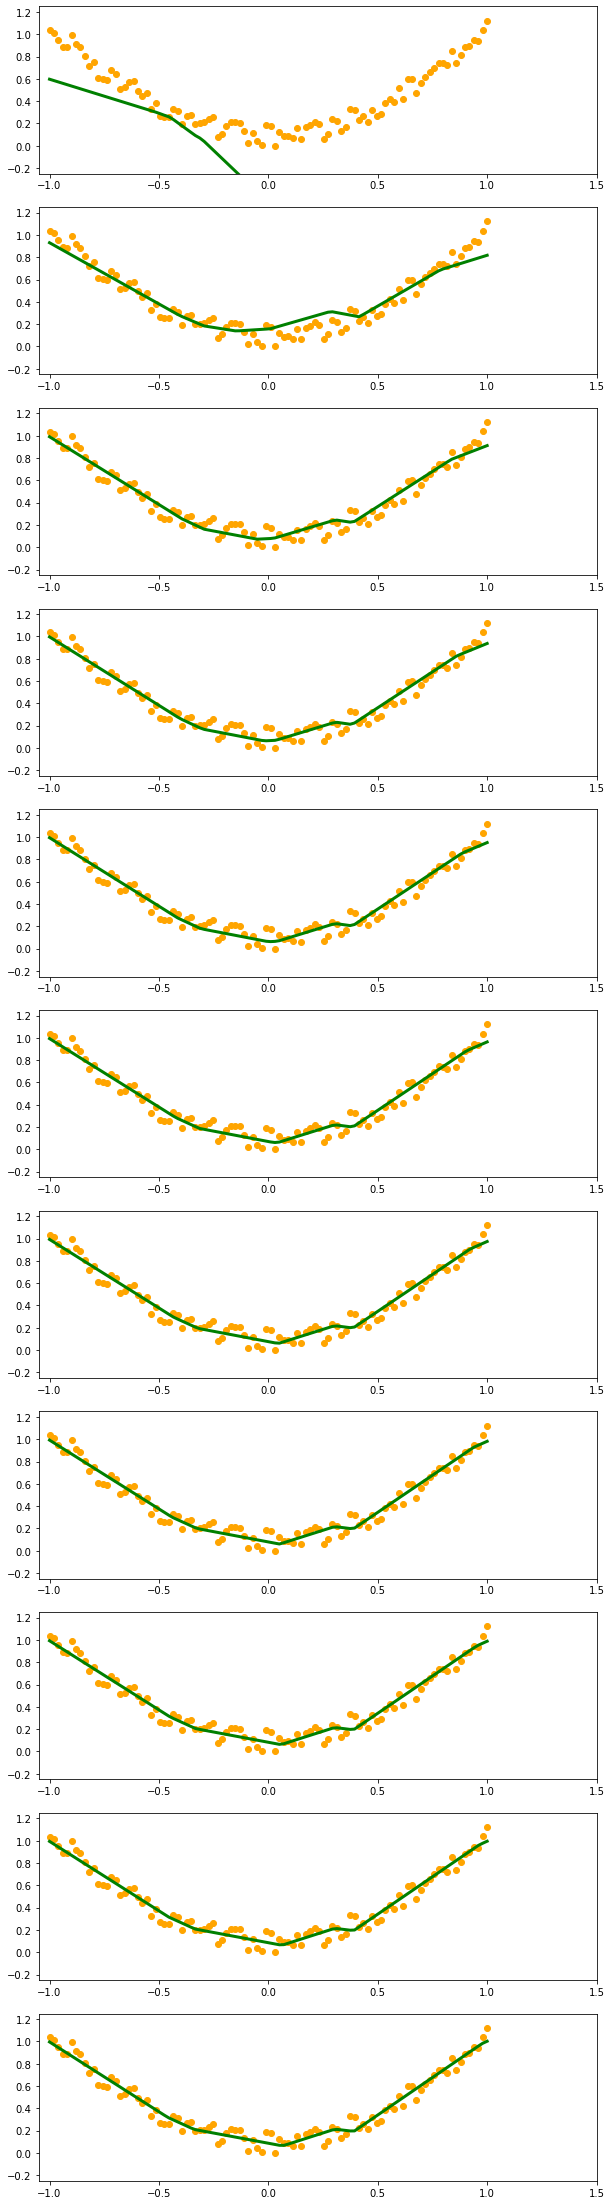

In [51]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(ys), 1, figsize=(10, 40))
for ax, y_ in zip(axs, ys):
    ax.scatter(X.numpy(), y.numpy(), color="orange")
    ax.plot(X.numpy(), y_.numpy(), 'g-', lw=3)
    ax.set_xlim(-1.05, 1.5)
    ax.set_ylim(-0.25, 1.25)